In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib as plt
from datetime import datetime
from datetime import time
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics.cluster import silhouette_score

In [3]:
conn_string = 'mysql://{user}:{password}@{host}/{db}?charset=utf8'.format(
    user='root', 
    password='x3rGjkz93e6CIkd7', 
    host = '35.237.252.223',  
    db='kayak'
)
engine = create_engine(conn_string)

In [4]:
total = '''
SELECT *
FROM kayak.flight
'''
df = pd.read_sql(total, con=engine)
df

,Airline,Price,Date,Time,Timestamp,Destination,Prediction
0,Delta,367,2018-12-23,8:15 am,2018-11-29 20:02:11,LAS,We're still gathering data for this route
1,Spirit Airlines,593,2018-12-23,7:00 am,2018-11-29 20:02:11,LAS,We're still gathering data for this route
2,American Airlines,593,2018-12-23,7:55 pm,2018-11-29 20:02:11,LAS,We're still gathering data for this route
3,Delta,601,2018-12-23,6:13 pm,2018-11-29 20:02:11,LAS,We're still gathering data for this route
4,JetBlue,679,2018-12-23,11:40 am,2018-11-29 20:02:11,LAS,We're still gathering data for this route
5,JetBlue,281,2018-12-24,9:00 pm,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
6,Delta,296,2018-12-24,7:55 pm,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
7,United Airlines,310,2018-12-24,7:25 pm,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
8,JetBlue,281,2018-12-24,7:30 pm,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
9,American Airlines,297,2018-12-24,8:30 am,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...


In [9]:
df['24time'] = df['Time'].astype(str)

In [10]:
df['24time'].head()

0     8:15 am
1     7:00 am
2     7:55 pm
3     6:13 pm
4    11:40 am
Name: 24time, dtype: object

In [11]:
def convert24(s):
    x = s[-2:]
    y = s[-8:-6]
    if (x == 'am') and (y == '12'):
        ss = ("00" + s[-6:-3]).strip()
    elif x == 'am' and y != '10' and y != '11':
        ss = ('0' + s[:-2]).strip()
    elif x == 'am':
        ss = s[:-2].strip()        
    elif (x == 'pm') and (y == '12'):
        ss = (s[:-2]).strip()
    else:
        ss = (str(int(y) +12) + s[-6:-3]).strip()
    return ss
df['converted'] = df['24time'].apply(convert24)

In [12]:
df['Hour'] = pd.to_numeric(df['converted'].str.slice(0,2))

In [111]:
df_dest = df[df.Destination == 'ORL']

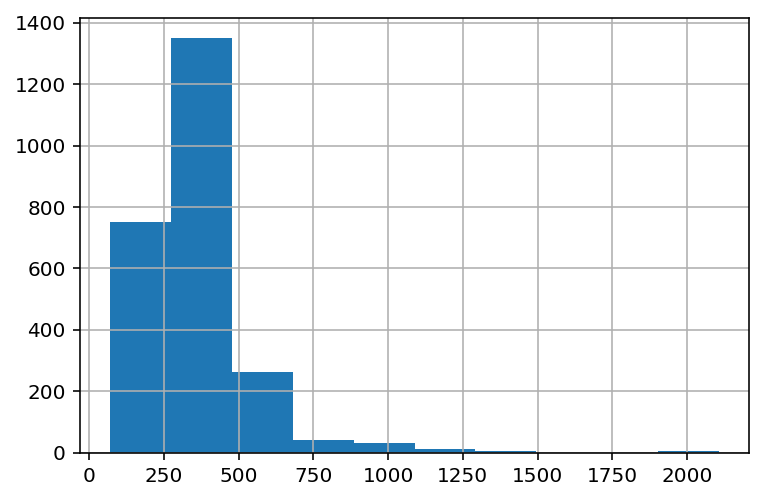

In [112]:
df_dest.Price.hist()

In [113]:
subset = df_dest[['Hour','Price']]
subset_features = subset.columns

In [114]:
# center and scale the data
scaler = StandardScaler()
price_data_scaled = scaler.fit_transform(subset[subset_features])
price_data_scaled = pd.DataFrame(price_data_scaled,columns=subset_features)
print("Before scaling:\n", subset[subset_features].describe())
print("\nAfter scaling:\n", np.round(price_data_scaled.describe(),2))

Before scaling:
               Hour        Price
count  2456.000000  2456.000000
mean     12.368078   346.392508
std       5.085792   182.840861
min       5.000000    70.000000
25%       8.000000   242.000000
50%      12.000000   331.000000
75%      17.000000   398.000000
max      22.000000  2107.000000

After scaling:
           Hour    Price
count  2456.00  2456.00
mean     -0.00     0.00
std       1.00     1.00
min      -1.45    -1.51
25%      -0.86    -0.57
50%      -0.07    -0.08
75%       0.91     0.28
max       1.89     9.63


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(price_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [129]:
# K-means on scaled data
subset['kmeans_scaled'] = [ "cluster_" + str(label) for label in kmeans.labels_ ]
print(kmeans.cluster_centers_)
kmean_center = subset.groupby('kmeans_scaled').mean()
kmean_center.reset_index(inplace=True)
kmean_center.set_index('kmeans_scaled')

[[-0.64606176  0.09126771]
 [ 1.11305984 -0.15723949]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Hour,Price
kmeans_scaled,,
cluster_0,9.083012,363.076577
cluster_1,18.027716,317.648559


In [130]:
kmean_center.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>kmeans_scaled</th>\n      <th>Hour</th>\n      <th>Price</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>cluster_0</td>\n      <td>9.083012</td>\n      <td>363.076577</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>cluster_1</td>\n      <td>18.027716</td>\n      <td>317.648559</td>\n    </tr>\n  </tbody>\n</table>'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Hour                       int64
Price                      int64
kmeans_scaled             object
Price Clusters by Hour    object
dtype: object


Text(0.5, 0.98, 'Prices Clustered by Hour')

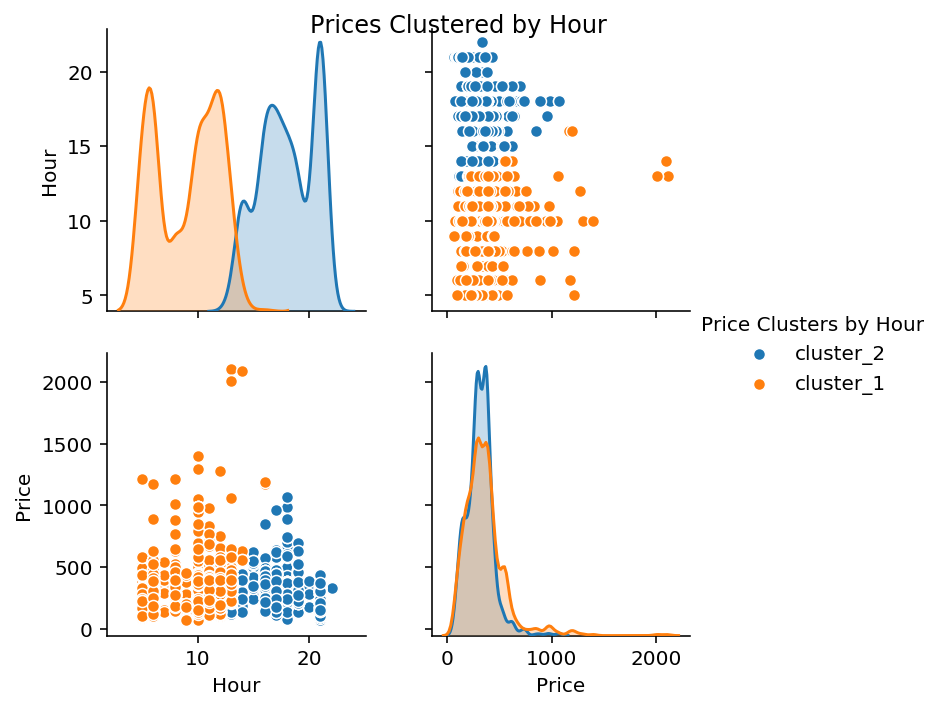

In [131]:
subset["Price Clusters by Hour"] = ["cluster_"+str(label+1) for label in kmeans.labels_]

print(subset.dtypes)
plot = sns.pairplot(subset,hue="Price Clusters by Hour")
plot.fig.suptitle('Prices Clustered by Hour')

Text(0, 0.5, 'Silhouette Coefficient')

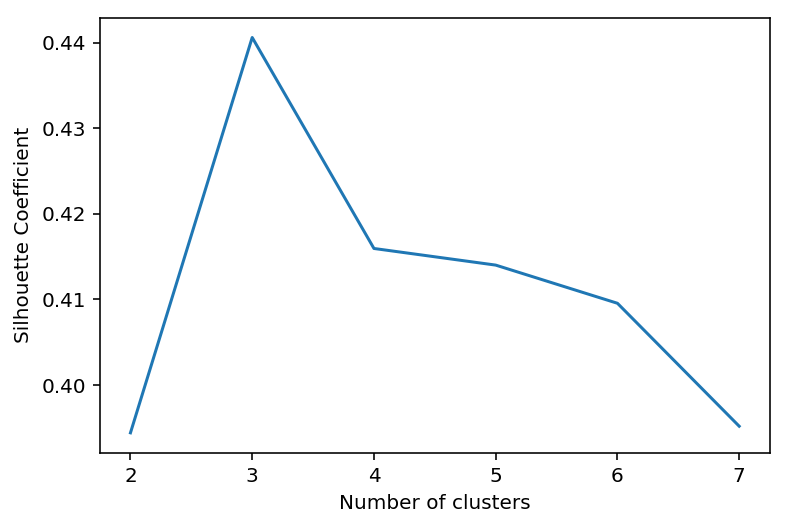

In [132]:
k_range = range(2,8)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(price_data_scaled)
    scores.append(silhouette_score(price_data_scaled, km_ss.labels_))

# plot the results
sns.mpl.pyplot.plot(k_range, scores)
sns.mpl.pyplot.xlabel('Number of clusters')
sns.mpl.pyplot.ylabel('Silhouette Coefficient')

In [88]:
subset['color'] = subset["Price Clusters by Hour"]
subset['color'].replace(['cluster_1', 'cluster_2'], ['c', 'r'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


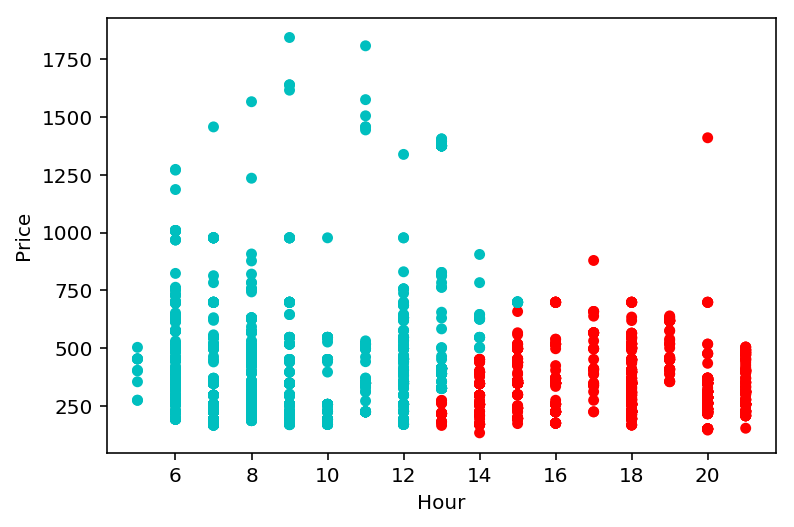

In [90]:
subset.plot(x="Hour",y='Price',kind='scatter',color=subset['color'],legend=True)